In [281]:
import face_recognition
import cv2
import os
from PIL import Image
from IPython.display import Image
import matplotlib.pyplot as plt
import glob

In [282]:
image = face_recognition.load_image_file("test_img.jpg")
face_locations = face_recognition.face_locations(image)
print(len(face_locations))

10


In [283]:

def zoom(img, zoom_factor=1.5):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)



(-0.5, 767.5, 1023.5, -0.5)

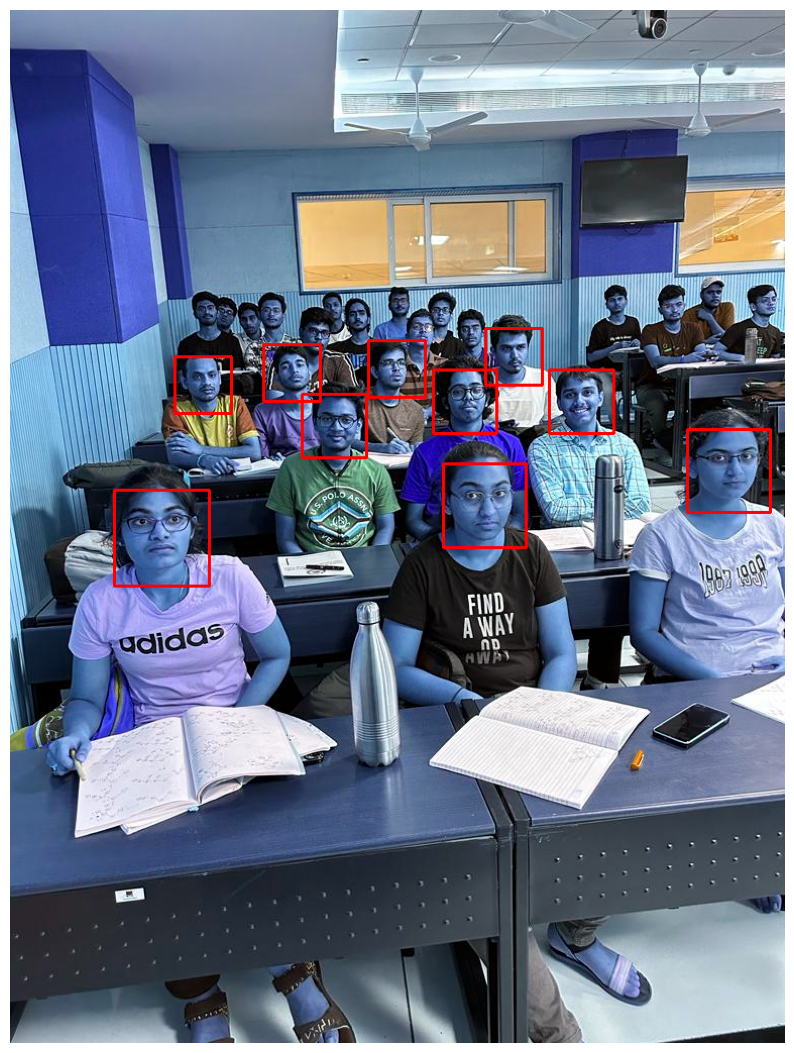

In [284]:
image = cv2.imread("test_img.jpg") 
window_name = 'Image'
zoomed = zoom(image, 3)

# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
i=1
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    # print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    image = cv2.rectangle(image, (left-10,top-10), (right+10,bottom+10), color, thickness) 
    cv2.imwrite("croppedimg/"+str(i)+".png",face_image)
    i+=1
# Displaying the image  
    # pil_image = Image.fromarray(face_image)
    # pil_image.show()
# cv2.imshow(window_name, image) 
# cv2.imshow(window_name, image)  
# Image(filename='test.png')
plt.figure(figsize=(10,20))
plt.imshow(image)
plt.axis('off')

In [285]:
face_landmarks_list = face_recognition.face_landmarks(image)
print(len(face_landmarks_list))



10


In [286]:
import fnmatch

dir_path = 'student_details'
number_of_student = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
print('File Count:', number_of_student)

File Count: 77


In [ ]:

unknown_dir='croppedimg'
 
student_img_encodings=[]
students=[]
# i=1
for img in glob.glob(((dir_path)+"/*.png")):
    print(img)
    n= face_recognition.load_image_file(img)
    # # plt.imshow(n)
    known_encoding = face_recognition.face_encodings(n)[0]
    student_img_encodings.extend([known_encoding])
    students.extend([img])


print(len(student_img_encodings))

 

student_details\220001001.png
student_details\220001002.png
student_details\220001003.png
student_details\220001004.png
student_details\220001005.png
student_details\220001006.png
student_details\220001008.png
student_details\220001009.png
student_details\220001010.png
student_details\220001011.png
student_details\220001012.png
student_details\220001013.png
student_details\220001014.png
student_details\220001015.png
student_details\220001016.png
student_details\220001017.png
student_details\220001018.png
student_details\220001021.png
student_details\220001022.png
student_details\220001023.png
student_details\220001024.png
student_details\220001025.png
student_details\220001026.png
student_details\220001027.png
student_details\220001028.png
student_details\220001029.png
student_details\220001031.png
student_details\220001032.png
student_details\220001033.png
student_details\220001034.png
student_details\220001035.png
student_details\220001036.png
student_details\220001037.png
student_de

In [273]:
print(len(students))

77


In [287]:
for unknownimg in glob.glob(((unknown_dir)+"/*.png")):
    img = cv2.imread(unknownimg)
    zoomed = zoom(img, 3)
    cv2.imwrite(unknownimg,zoomed)


In [288]:
for unknownimg in glob.glob(((unknown_dir)+"/*.png")):
    # print(unknownimg)
    n= face_recognition.load_image_file(unknownimg)
    # # plt.imshow(n)
    unknown_encoding = face_recognition.face_encodings(n)
    if(len(unknown_encoding)>0):
        unknown_encoding=unknown_encoding[0]
        pos=-1
        minm=2
        for i in  range (len(student_img_encodings)):
            my_face_encoding=student_img_encodings[i]
            # print(len(unknown_encoding))
            dist = face_recognition.api.face_distance([my_face_encoding],unknown_encoding)
            if(dist<minm):
                minm=dist
                pos=i

        print(unknownimg,students[pos])


croppedimg\1.png student_details\220001024.png
croppedimg\10.png student_details\220001076.png
croppedimg\2.png student_details\220001032.png
croppedimg\3.png student_details\220001003.png
croppedimg\4.png student_details\220001061.png
croppedimg\5.png student_details\220001006.png
croppedimg\6.png student_details\220001001.png
croppedimg\7.png student_details\220001070.png
croppedimg\8.png student_details\220001004.png
croppedimg\9.png student_details\220001045.png
